In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd

In [3]:
##function definition
from functions import *
from climada_functions import *
from constants import * 
idx = pd.IndexSlice


## Load and compute indices

In [4]:
#load
ind_fn1 = "remote_indices_O20_sp_avg_modlist_allmods_historical_ssp585.csv"
ind_df1 = pd.read_csv(pathcirc+ind_fn1,header=[0,1],index_col=[0,1])

ind_fn2 = "additional_remote_indices_O20_sp_avg_modlist_allmods_historical_ssp585.csv"
ind_df2 = pd.read_csv(pathcirc+ind_fn2,header=[0,1],index_col=[0,1])

In [5]:
#do Nino4-Nino3
diffnino = ind_df2.loc[:,idx["Nino4",:]] - ind_df2.loc[:,idx["Nino3",:]].values
diffnino.rename(columns={"Nino4":"Nino4-Nino3"},inplace=True)
ind_df2 = ind_df2.drop(["Nino4","Nino3"],axis=1,level=0)
ind_df2 = pd.concat([ind_df2,diffnino],axis=1)


In [6]:
# concat 2 sets of indices
ind_df = pd.concat([ind_df1,ind_df2],axis=1)

In [7]:
preds = ["pol","trop","strat","NAWH","Nino4-Nino3"]

In [38]:
dind_df.loc[:,"pol"].max()

12.303840562001085

In [8]:
## Memsep
#compute fut - past difference
dind_df = ind_df.loc[:,idx[:,"ssp585"]] - ind_df.loc[:,idx[:,"historical"]].values

#normalized fut-past diff
ndind_df = dind_df.copy()
ndind_df.loc[:,preds] = ndind_df.loc[:,preds] / ndind_df.loc[:,"sfcT"]
dind_df = dind_df.droplevel(1,axis=1)
ndind_df = ndind_df.droplevel(1,axis=1)

#standardize
an_ndind_memsep_df = ndind_df.copy()
std_an_ndind_memsep_df = ndind_df.copy()
an_ndind_memsep_df.loc[:,preds] = an_ndind_memsep_df.loc[:,preds] - ndind_df.loc[:,preds].mean()
std_an_ndind_memsep_df.loc[:,preds] = an_ndind_memsep_df.loc[:,preds]/ndind_df.loc[:,preds].std()

#member mean
std_an_ndind_memmean_df = std_an_ndind_memsep_df.groupby("model").mean()

In [14]:
std_an_ndind_memmean_df.corr()

indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
indice,,,,,,
sfcT,1.000000,-0.181523,-0.181093,-0.197938,0.326035,-0.195926
pol,-0.181523,1.000000,-0.093182,-0.249611,0.105323,0.031696
trop,-0.181093,-0.093182,1.000000,-0.076758,-0.286676,0.061522
strat,-0.197938,-0.249611,-0.076758,1.000000,-0.161657,0.718771
NAWH,0.326035,0.105323,-0.286676,-0.161657,1.000000,-0.019280
Nino4-Nino3,-0.195926,0.031696,0.061522,0.718771,-0.019280,1.000000


In [9]:
## Memmean

#member mean first
ind_memmean_df = ind_df.copy()
ind_memmean_df = ind_df.groupby("model").mean()

#compute fut - past difference
dind_memmean_df = ind_memmean_df.loc[:,idx[:,"ssp585"]] - ind_memmean_df.loc[:,idx[:,"historical"]].values

#normalized fut-past diff
ndind_memmean_df = dind_memmean_df.copy()
ndind_memmean_df.loc[:,preds] = ndind_memmean_df.loc[:,preds] / ndind_memmean_df.loc[:,"sfcT"]
dind_memmean_df = dind_memmean_df.droplevel(1,axis=1)
ndind_memmean_df = ndind_memmean_df.droplevel(1,axis=1)

#standardize
an_ndind_memmean_df = ndind_memmean_df.copy()
an_ndind_memmean_df.loc[:,preds] = an_ndind_memmean_df.loc[:,preds] - ndind_memmean_df.loc[:,preds].mean()
std_an_ndind_memmean_df2 = ndind_memmean_df.copy()
std_an_ndind_memmean_df2.loc[:,preds] = an_ndind_memmean_df.loc[:,preds]/ndind_memmean_df.loc[:,preds].std()


In [42]:
std_an_ndind_memmean_df2-std_an_ndind_memmean_df


indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
model,,,,,,
ACCESS-CM2,0.000000e+00,-0.009559,0.067537,-0.135097,0.000434,-0.173930
ACCESS-ESM1-5,3.774758e-14,-0.019598,0.096247,0.019331,-0.000038,-0.182102
AWI-CM-1-1-MR,0.000000e+00,0.124630,0.106068,0.115153,0.008427,0.078356
BCC-CSM2-MR,0.000000e+00,0.218903,0.083163,0.073504,0.020574,-0.004612
CMCC-CM2-SR5,0.000000e+00,-0.063104,0.110802,-0.068605,0.002662,-0.077727
CMCC-ESM2,0.000000e+00,-0.018491,0.094004,-0.076079,0.006878,-0.055449
CNRM-CM6-1,1.865175e-14,-0.151354,0.029314,0.031495,0.002872,-0.010263
CNRM-CM6-1-HR,0.000000e+00,-0.184490,0.042835,0.214823,-0.017869,0.113388
CNRM-ESM2-1,-1.865175e-14,-0.159864,0.017852,0.047786,0.002452,0.045664


In [17]:
std_an_ndind_memmean_df.corr()

indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
indice,,,,,,
sfcT,1.000000,-0.181523,-0.181093,-0.197938,0.326035,-0.195926
pol,-0.181523,1.000000,-0.093182,-0.249611,0.105323,0.031696
trop,-0.181093,-0.093182,1.000000,-0.076758,-0.286676,0.061522
strat,-0.197938,-0.249611,-0.076758,1.000000,-0.161657,0.718771
NAWH,0.326035,0.105323,-0.286676,-0.161657,1.000000,-0.019280
Nino4-Nino3,-0.195926,0.031696,0.061522,0.718771,-0.019280,1.000000


In [10]:
##subselect models from 1 modelling center
ind_df_1cen = ind_df.copy()
ind_df_1cen = ind_df_1cen.reindex(index=modlist_1cen,level=0)

#compute fut - past difference
dind_df_1cen = ind_df_1cen.loc[:,idx[:,"ssp585"]] - ind_df_1cen.loc[:,idx[:,"historical"]].values

#normalized fut-past diff
ndind_df_1cen = dind_df_1cen.copy()
ndind_df_1cen.loc[:,preds] = ndind_df_1cen.loc[:,preds] / ndind_df_1cen.loc[:,"sfcT"]
dind_df_1cen = dind_df_1cen.droplevel(1,axis=1)
ndind_df_1cen = ndind_df_1cen.droplevel(1,axis=1)

#standardize
an_ndind_memsep_df_1cen = ndind_df_1cen.copy()
an_ndind_memsep_df_1cen = an_ndind_memsep_df_1cen - ndind_df_1cen.mean()
std_an_ndind_memsep_df_1cen = an_ndind_memsep_df_1cen/ndind_df_1cen.std()

#member mean
std_an_ndind_memmean_df_1cen = std_an_ndind_memsep_df_1cen.groupby("model").mean()

In [19]:
std_an_ndind_memmean_df_1cen.corr()

indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
indice,,,,,,
sfcT,1.000000,-0.317581,-0.125940,-0.186987,0.440809,-0.103551
pol,-0.317581,1.000000,-0.306870,0.035767,-0.101144,0.085750
trop,-0.125940,-0.306870,1.000000,-0.018782,-0.351326,0.187580
strat,-0.186987,0.035767,-0.018782,1.000000,-0.384320,0.607829
NAWH,0.440809,-0.101144,-0.351326,-0.384320,1.000000,-0.235392
Nino4-Nino3,-0.103551,0.085750,0.187580,0.607829,-0.235392,1.000000


In [20]:
std_an_ndind_memmean_df.loc[modlist_1cen].corr()

indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
indice,,,,,,
sfcT,1.000000,-0.317581,-0.125940,-0.186987,0.440809,-0.103551
pol,-0.317581,1.000000,-0.306870,0.035767,-0.101144,0.085750
trop,-0.125940,-0.306870,1.000000,-0.018782,-0.351326,0.187580
strat,-0.186987,0.035767,-0.018782,1.000000,-0.384320,0.607829
NAWH,0.440809,-0.101144,-0.351326,-0.384320,1.000000,-0.235392
Nino4-Nino3,-0.103551,0.085750,0.187580,0.607829,-0.235392,1.000000


In [49]:
#dind_df.to_csv(pathcirc+"diff_"+"all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv")
#dind_memmean_df.to_csv(pathcirc+"diff_memmean_"+"all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv")
#ndind_df.to_csv(pathcirc+"norm_diff_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#rind_df.to_csv(pathcirc+"ratio_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#nrind_df.to_csv(pathcirc+"norm_ratio_"+"remote_indices_sp_avg_modlist_allscen_historical_ssp585.csv")
#std_an_ndind_memmean_df2.to_csv(pathcirc+"std_an_"+"all_remote_indices_O20_sp_avg_allmods_historical_ssp585.csv")

## Boxplot indices

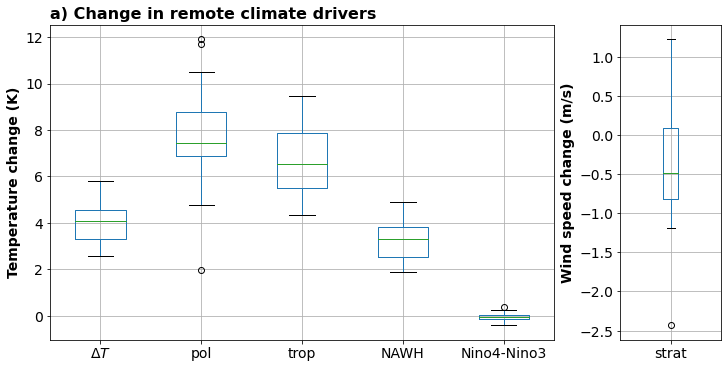

In [17]:
fig = plt.figure(constrained_layout=True,figsize=(10,5))
axs = fig.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios': [5, 1]})
dind_memmean_df.loc[:,["sfcT","pol","trop","NAWH","Nino4-Nino3"]].boxplot(ax=axs[0])
axs[0].set_ylabel("Temperature change (K)",fontsize=14,fontweight='bold')
dind_memmean_df.loc[:,["strat"]].boxplot(ax=axs[1])
axs[1].set_ylabel("Wind speed change (m/s)",fontsize=14,fontweight='bold')
axs[0].set_title("a) Change in remote climate drivers",fontsize=16,fontweight='bold',loc="left")
axs[0].set_xticklabels([r"$\Delta T$","pol","trop","NAWH","Nino4-Nino3"])
axs[0].tick_params(axis='y', labelsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)
savelocation="results/figures/CircScen/indices/"
savefileName = 'RM_ind_OU20.png'
fig.savefig(savelocation+savefileName,transparent=False,bbox_inches='tight')



In [23]:
dind_memmean_df

indice,sfcT,pol,trop,strat,NAWH,Nino4-Nino3
model,,,,,,
ACCESS-CM2,4.834694,9.143099,7.992199,0.874373,3.940988,0.235150
ACCESS-ESM1-5,3.937822,7.415604,6.176546,-0.508935,3.232863,0.208269
AWI-CM-1-1-MR,3.575427,7.146866,5.490276,-1.182888,2.809386,-0.263903
BCC-CSM2-MR,3.322085,6.891896,5.334170,-0.816363,2.460681,-0.111383
CMCC-CM2-SR5,4.109837,7.595661,6.251339,0.183423,3.317167,0.008094
CMCC-ESM2,4.073074,7.673603,6.404852,0.243988,3.223813,-0.036033
CNRM-CM6-1,4.588191,8.151451,8.064554,-0.841823,3.832651,-0.162862
CNRM-CM6-1-HR,4.554764,7.974094,7.875693,-2.434483,4.023071,-0.413656
CNRM-ESM2-1,4.174720,7.365731,7.430046,-0.812171,3.522459,-0.218318


## Correlation tables indices

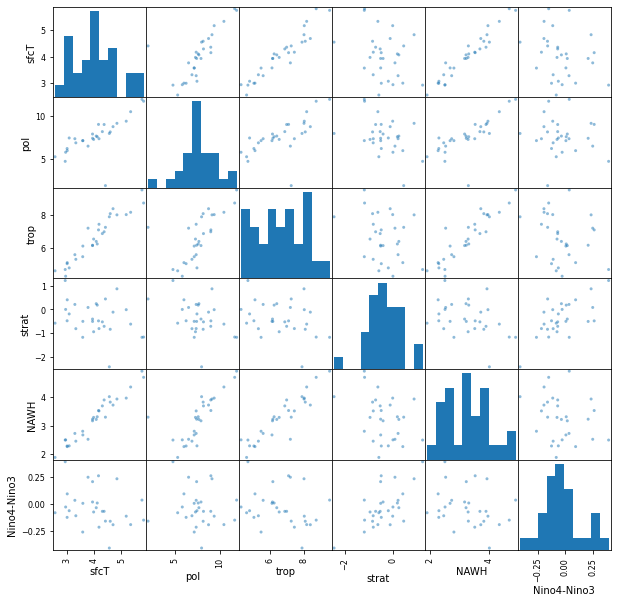

In [194]:
from pandas.plotting import scatter_matrix

scatter_matrix(dind_memmean_df, alpha=0.5, figsize=(10, 10), diagonal="hist");

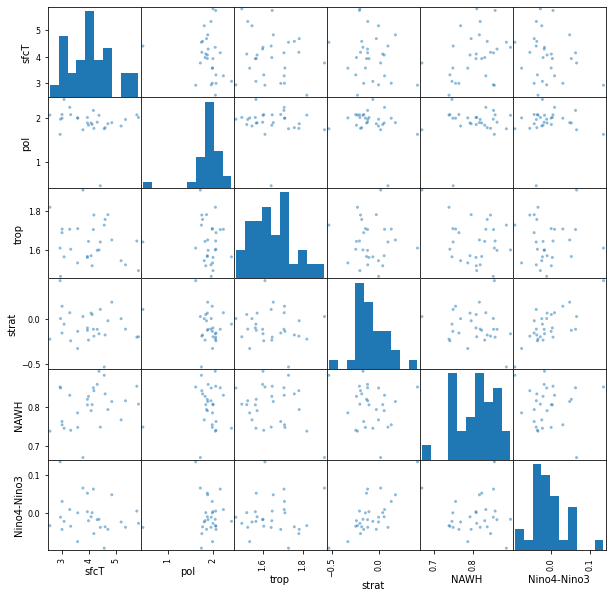

In [195]:
ndind_memmean_df = ndind_df.groupby("model",axis=0).mean()
scatter_matrix(ndind_memmean_df, alpha=0.5, figsize=(10, 10), diagonal="hist");

## Correlation table before/after scaling

In [246]:
matrix1 = dind_memmean_df.iloc[:,1:].corr()
matrix1.index = matrix1.index.rename("before scaling")
matrix1

indice,pol,trop,strat
before scaling,,,
pol,1.000000,0.788169,-0.260780
trop,0.788169,1.000000,-0.191516
strat,-0.260780,-0.191516,1.000000


In [247]:
matrix2 = ndind_memmean_df.iloc[:,1:].corr()
matrix2.index = matrix2.index.rename("after scaling")

matrix2

indice,pol,trop,strat
after scaling,,,
pol,1.000000,0.012558,-0.276327
trop,0.012558,1.000000,-0.203970
strat,-0.276327,-0.203970,1.000000


## Check correlations with boostrapping

In [150]:
from random import sample

In [169]:
# select vars
nreps = 1000
modlist = modlist_ua
ind = std_an_ndind_memmean_df
sample_size = len(modlist)
sub_sample_size  = int(round(sample_size/2,0))

# store vars
resarr = np.nan * np.ones(shape=(4,4,nreps))

for rep in range(nreps):
    subsel = sample(modlist, k=sub_sample_size)
    resarr[:,:,rep] = ind.loc[subsel].corr()
    
    

In [215]:
qt975 = np.quantile(resarr,0.975,axis=2)
qt05 = np.quantile(resarr,0.5,axis=2)
qt025 = np.quantile(resarr,0.025,axis=2)

In [227]:
names = ["DT","pol","trop","strat"]
df25 = pd.DataFrame(qt025,index=names,columns=names)
df25.index.name = "2.5 percentile"
df25

,DT,pol,trop,strat
2.5 percentile,,,,
DT,1.000000,-0.590550,-0.548739,-0.520155
pol,-0.590550,1.000000,-0.474492,-0.601102
trop,-0.548739,-0.474492,1.000000,-0.396088
strat,-0.520155,-0.601102,-0.396088,1.000000


In [226]:
names = ["DT","pol","trop","strat"]
df50 = pd.DataFrame(qt05,index=names,columns=names)
df50.index.name = "50 percentile"
df50

,DT,pol,trop,strat
50 percentile,,,,
DT,1.000000,-0.198418,-0.187823,-0.190902
pol,-0.198418,1.000000,-0.101717,-0.284293
trop,-0.187823,-0.101717,1.000000,-0.071797
strat,-0.190902,-0.284293,-0.071797,1.000000


In [225]:
qt975
df975 = pd.DataFrame(qt975,index=names,columns=names)
df975.index.name = "97.5 percentile"
df975

,DT,pol,trop,strat
97.5 percentile,,,,
DT,1.000000,0.109620,0.290523,0.261515
pol,0.109620,1.000000,0.138673,0.285071
trop,0.290523,0.138673,1.000000,0.254903
strat,0.261515,0.285071,0.254903,1.000000


## Phase plot indices

(1.0, 2.5)

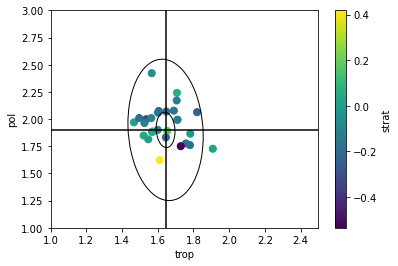

In [230]:
fig = plt.figure()
ax = fig.subplots(nrows=1,ncols=1)

x = ndind_memmean_df["trop"]
y = ndind_memmean_df["pol"]
z = ndind_memmean_df["strat"]
ndind_memmean_df.plot.scatter(ax=ax,x="trop", y="pol", c="strat", cmap="viridis", s=50);
confidence_ellipse2(x, y, ax, n_std=0.5,edgecolor='black')
confidence_ellipse2(x, y, ax, n_std=2,edgecolor='black')

ax.hlines(y.mean(),xmin=-5,xmax=5,color='k')
ax.vlines(x.mean(),ymin=-6,ymax=6,color='k')
ax.set_ylim((1,3))
ax.set_xlim((1,2.5))

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, scale_x=None,scale_y=None, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    if not scale_x:    
        scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the standard deviation of y ...
    if not scale_y:
        scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def confidence_ellipse2(x, y, ax, n_std=3, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)



## select models

In [256]:
polmods_pos = std_an_ndind_memmean_df.where(std_an_ndind_memmean_df["pol"]>0.25).dropna(how="all").index.tolist()
polmods_neg = std_an_ndind_memmean_df.where(std_an_ndind_memmean_df["pol"]<-0.25).dropna(how="all").index.tolist()

In [258]:
polmods_neg

['CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'GISS-E2-1-G',
 'HadGEM3-GC31-MM',
 'INM-CM4-8',
 'KACE-1-0-G']